Cleaning


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn import naive_bayes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [5]:
data=pd.read_csv(r'D:\python\Machine-learning-project-\DataSet\train (1).csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


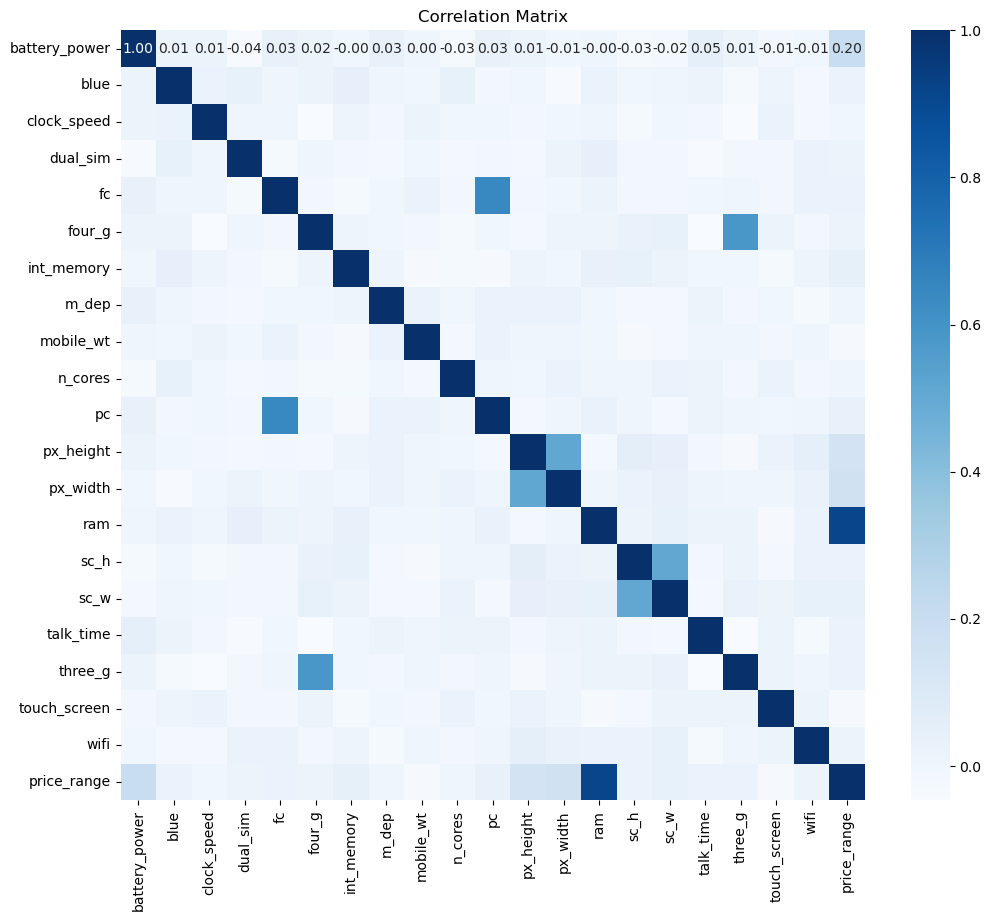

In [10]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

as we can conclude from correlation matrix that there's a lot of features that don't have as much as importance as others so we need to select the more correlated features


In [11]:
x=data.iloc[: , :-1]
y=data['price_range']

In [12]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [13]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [14]:
sc=StandardScaler()
xScaled=sc.fit_transform(x)

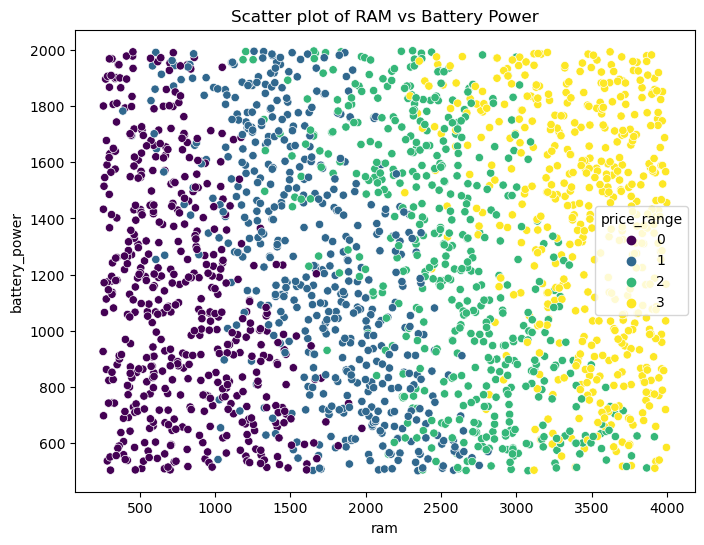

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example with two features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='ram', y='battery_power', hue='price_range', palette='viridis')
plt.title('Scatter plot of RAM vs Battery Power')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Splitting the data
X = data.drop('price_range', axis=1)
y = data['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train linear SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.97      0.98       151
           1       0.94      0.99      0.97       146
           2       0.99      0.94      0.97       148
           3       0.97      0.99      0.98       155

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define a range of C values
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Use SVM with a linear kernel
svc = SVC(kernel='linear', random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameter and the corresponding accuracy
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print("Best C:", best_C)
print("Best Cross-Validation Accuracy:", best_score)


Best C: 0.01
Best Cross-Validation Accuracy: 0.97


insights of the code:
#Data is Linearly Separable:
The linear kernel performs very well, indicating that the relationships in the dataset are effectively captured by a linear decision boundary this means that the data are seprated will so th kernel type is linear as data is linear sepraple.
#The cross-validation score and test accuracy are very close (~96.57% vs. 98%), showing no signs of overfitting.

In [18]:
y = data["price_range"].values
x_data=data.drop(["price_range"],axis=1)
x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=42)

In [19]:
from sklearn.svm import SVC
svm=SVC(random_state=42)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.9553333333333334
test accuracy: 0.952


In [20]:
from sklearn.model_selection import GridSearchCV

C = [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10]  
kernel = ["linear", "rbf", "poly", "sigmoid"] 
gamma = ["scale", "auto", 0.1, 0.01, 0.001, 0.0001, 1, 2]  
decision_function_shape = ["ovo", "ovr"] 

In [21]:
svm=SVC(random_state=42)
grid_svm=GridSearchCV(estimator=svm,cv=5,param_grid=dict(kernel=kernel,C=C, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(x_train,y_train)
print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9640000000000001
best param:  {'C': 10, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'poly'}


In [22]:
import pandas as pd

# Take a sample of the data (e.g., 30% of the dataset)
data_sample = data.sample(frac=0.3, random_state=42)

# Split the sampled data into features and target
X = data_sample.drop('price_range', axis=1)
y = data_sample['price_range']


In [23]:
from sklearn.model_selection import train_test_split

# Splitting the sampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Train linear SVM
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report for Linear SVM:")
print(classification_report(y_test, y_pred))


Classification Report for Linear SVM:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.94      0.97        48
           2       0.93      0.98      0.96        44
           3       0.97      0.97      0.97        34

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for different kernels
param_grid = {
    'kernel': ["linear", "rbf", "poly", "sigmoid"],  # Test different kernels
    'C': [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10],       # Regularization parameter
    'gamma': ["scale", "auto", 0.1, 0.01, 0.001],   # For rbf and poly kernels
    'degree': [2, 3]                                # Only for poly kernel
}

# Initialize SVC
svc = SVC(random_state=42)

# Perform GridSearchCV on sampled data
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Test the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report for Tuned SVM:")
print(classification_report(y_test, y_pred))


Best Parameters from Grid Search: {'C': 0.01, 'degree': 2, 'gamma': 'auto', 'kernel': 'poly'}
Best Cross-Validation Score: 0.9666666666666666
Classification Report for Tuned SVM:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       1.00      0.94      0.97        48
           2       0.95      0.95      0.95        44
           3       0.94      1.00      0.97        34

    accuracy                           0.97       180
   macro avg       0.97      0.97      0.97       180
weighted avg       0.97      0.97      0.97       180



This regularization parameter is quite low, suggesting that the model has a more relaxed approach to fitting the training data. It prioritizes a larger margin over perfectly fitting the data points, which can help reduce overfitting.

kernel = poly: The polynomial kernel was chosen as the best kernel. This indicates that the decision boundary between classes is non-linear and requires the flexibility provided by the polynomial kernel.


The cross-validation score of 0.967 suggests that the model performs consistently well across multiple folds of training data, with a solid generalization ability. This is a good sign that the model is not overfitting and will likely perform well on unseen data.

for recall
Class 0: Recall is 1.00, meaning all actual class 0 instances were correctly predicted.
Class 1: Recall is 0.94, meaning 94% of actual class 1 instances were predicted correctly.
Class 2: Recall is 0.95, meaning 95% of actual class 2 instances were predicted correctly.
Class 3: Recall is 1.00, meaning all actual class 3 instances were correctly predicted.


Precision:
Class 0: Precision is 0.98, meaning that 98% of predicted class 0 instances are correct.
Class 1: Precision is 1.00, indicating perfect accuracy for class 1.
Class 2: Precision is 0.95, meaning there is a small amount of misclassification for this class.
Class 3: Precision is 0.94, which is very good but still indicates a few misclassified instances.


F1-scores for all classes are high, especially for classes 0 and 3, indicating a balanced performance between precision and recall.


1-Hyperparameter tuning is the process of finding the optimal values for parameters that control the SVM's behavior.
(such as C and kernel)

(a)C importance:determines the trade-off between:
    - maximizing the margin between classes
    - minimizing the misclassification error
(b)kernel importance:
    - choosing a kernel that suits the data effectively
    The kernel parameter in Support Vector Machines (SVM) determines how the input data is transformed into a higher-dimensional space to make it easier to find a decision boundary that separates the data
    
2-GridSearchCV helps find the optimal values for these parameters systematically, ensuring the model performs its best. 
so here we fond that the best c is Best C: 0.01 

In [26]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

# Display feature importances
importances = result.importances_mean
indices = importances.argsort()

# Print the top 5 important features
print("Top 5 Important Features:")
for idx in indices[-5:]:
    print(f"{X.columns[idx]}: {importances[idx]}")


Top 5 Important Features:
mobile_wt: 0.006666666666666643
px_width: 0.0961111111111111
px_height: 0.12444444444444443
battery_power: 0.2094444444444444
ram: 0.6827777777777777


In [27]:
# Select the top 3 important features based on permutation importance
important_features = ['ram', 'battery_power', 'px_height']

# Use only these features for training
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Train the model with selected features
model.fit(X_train_selected, y_train)

# Evaluate the model
y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       0.93      0.83      0.88        48
           2       0.85      0.89      0.87        44
           3       0.94      0.94      0.94        34

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.91       180
weighted avg       0.92      0.92      0.92       180



In [28]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Splitting the data
X = data.drop('price_range', axis=1)
y = data['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model
model = SVC(kernel='poly', C=0.01, degree=2, gamma='auto', random_state=42)

# Train the model using all features
X_train_all = X_train  # All features
X_test_all = X_test    # All features
model.fit(X_train_all, y_train)
y_pred_all = model.predict(X_test_all)
report_all = classification_report(y_test, y_pred_all, output_dict=True)

# Train the model using selected features (from permutation importance)
X_train_selected = X_train[['ram', 'battery_power', 'px_height','px_width']]
X_test_selected = X_test[['ram', 'battery_power', 'px_height', 'px_width']]
model.fit(X_train_selected, y_train)
y_pred_selected = model.predict(X_test_selected)
report_selected = classification_report(y_test, y_pred_selected, output_dict=True)

# Convert reports into DataFrame for comparison
report_all_df = pd.DataFrame(report_all).T
report_selected_df = pd.DataFrame(report_selected).T

# Combine both reports into one DataFrame
comparison_df = pd.concat([report_all_df[['precision', 'recall', 'f1-score']], 
                           report_selected_df[['precision', 'recall', 'f1-score']]], 
                          axis=1, 
                          keys=['All Features', 'Selected Features'])

# Display the comparison table
print(comparison_df)


             All Features                     Selected Features            \
                precision    recall  f1-score         precision    recall   
0                0.993103  0.953642  0.972973          1.000000  0.953642   
1                0.911392  0.986301  0.947368          0.923077  0.986301   
2                0.938356  0.925676  0.931973          0.945578  0.939189   
3                0.973510  0.948387  0.960784          0.973856  0.961290   
accuracy         0.953333  0.953333  0.953333          0.960000  0.960000   
macro avg        0.954090  0.953502  0.953275          0.960628  0.960106   
weighted avg     0.954654  0.953333  0.953480          0.961104  0.960000   

                        
              f1-score  
0             0.976271  
1             0.953642  
2             0.942373  
3             0.967532  
accuracy      0.960000  
macro avg     0.959955  
weighted avg  0.960146  


feature selection

There are a lot of features but which matters the most?

In [29]:
threshold=0.01
high=correlation_matrix.index[abs(correlation_matrix['price_range'])>threshold].to_list()
high.remove('price_range')
xSelected=data[high]
xSelected

,battery_power,blue,dual_sim,fc,four_g,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,0,1,0,7,188,2,20,756,2549,9,7,19,0,0,1
1,1021,1,1,0,1,53,136,6,905,1988,2631,17,3,7,1,1,0
2,563,1,1,2,1,41,145,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,0,0,0,10,131,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,0,13,1,44,141,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,1,0,1,2,106,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,1,0,0,39,187,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,1,1,1,36,108,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0,4,1,46,145,5,336,670,869,18,10,19,1,1,1


**KNN Algorithm**

Split the data into training and testing

In [30]:
X_train,X_test,y_train,y_test=train_test_split(xSelected,y,test_size=0.2,random_state=42)

Find the optimal k value using cross-validation

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 20)
metrics = ['euclidean', 'manhattan']
results = []

for k in k_values:
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

        # Store results:
        results.append({
            'k': k,
            'metric': metric,
            'mean_accuracy': np.mean(cv_scores),
        })


results_df = pd.DataFrame(results)
print(results_df)

     k     metric  mean_accuracy
0    1  euclidean       0.885000
1    1  manhattan       0.890625
2    2  euclidean       0.891875
3    2  manhattan       0.891875
4    3  euclidean       0.908125
5    3  manhattan       0.904375
6    4  euclidean       0.902500
7    4  manhattan       0.901875
8    5  euclidean       0.918125
9    5  manhattan       0.915000
10   6  euclidean       0.916875
11   6  manhattan       0.913750
12   7  euclidean       0.921875
13   7  manhattan       0.920000
14   8  euclidean       0.918125
15   8  manhattan       0.909375
16   9  euclidean       0.923750
17   9  manhattan       0.921875
18  10  euclidean       0.922500
19  10  manhattan       0.916875
20  11  euclidean       0.928750
21  11  manhattan       0.921250
22  12  euclidean       0.927500
23  12  manhattan       0.913750
24  13  euclidean       0.924375
25  13  manhattan       0.921875
26  14  euclidean       0.925625
27  14  manhattan       0.920000
28  15  euclidean       0.917500
29  15  ma

In [32]:
best_result = results_df.loc[results_df['mean_accuracy'].idxmax()]
best_k = best_result['k']
best_metric = best_result['metric']
print(f"Best k: {best_k}, Best metric: {best_metric}")

Best k: 11, Best metric: euclidean


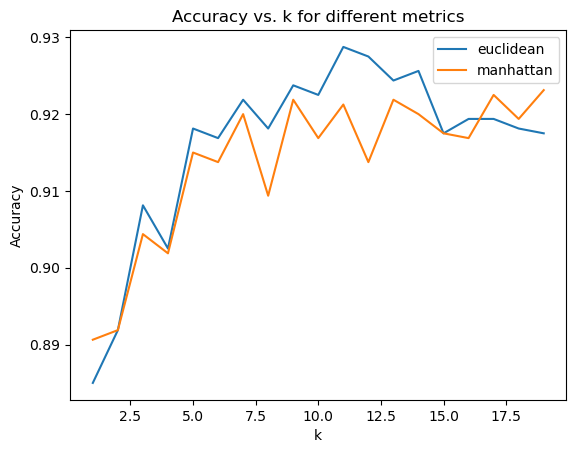

In [33]:
for metric in results_df['metric'].unique():
    metric_df = results_df[results_df['metric'] == metric]
    plt.plot(metric_df['k'], metric_df['mean_accuracy'], label=metric)

plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k for different metrics")
plt.legend()
plt.show()

Further optimize k using GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV
parameters ={'n_neighbors':range(1 ,20)}
grid_knn =GridSearchCV(estimator=knn ,
                     param_grid=parameters ,
                     scoring ="accuracy" ,
                     cv =5 ,
                     verbose=1 ,
                     n_jobs=-1)

In [35]:
grid_knn.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='manhattan', n_neighbors=19),
             n_jobs=-1, param_grid={'n_neighbors': range(1, 20)},
             scoring='accuracy', verbose=1)

In [36]:
grid_knn.best_params_

{'n_neighbors': 19}

Train the KNN classifier with the optimal k which is 11


In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

Evaluate the model's accuracy on the test set

In [38]:
knn.score(X_test,y_test)

0.95

Classification report to see precision, recall and F1 score

In [39]:
predknn=knn.predict(X_test)
print(classification_report(y_test,predknn))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       105
           1       0.92      0.96      0.94        91
           2       0.91      0.93      0.92        92
           3       1.00      0.93      0.96       112

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



-Accuracy: The overall accuracy of the model is 95%, which is quite high. This means that the model correctly predicted the class for 95% of the instances in the test set.

-Macro Average and Weighted Average: Both macro average and weighted average for precision, recall, and F1-score are around 95%, indicating a good balance in performance across all classes.
Class-wise Performance

Class 0: Achieves high precision (0.97), recall (0.98), and F1-score (0.98), indicating excellent performance in identifying instances of this class.

Class 1: Shows good performance with precision (0.92), recall (0.96), and F1-score (0.94).
Class 2: Has slightly lower precision (0.91) and recall (0.93) compared to the other classes, but still maintains a decent F1-score (0.92).

Class 3: Achieves perfect precision (1.00), meaning it correctly identifies all instances of this class. However, it has a lower recall (0.93), indicating some instances of this class were missed. The F1-score (0.96) balances precision and recall.

In [40]:
train_accuracyknn = knn.score(X_train, y_train)
test_accuracyknn = knn.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracyknn*100}%")
print(f"Testing Accuracy: {test_accuracyknn*100}%")

Training Accuracy: 95.1875%
Testing Accuracy: 95.0%


Confusion matrix to visualize knn performance

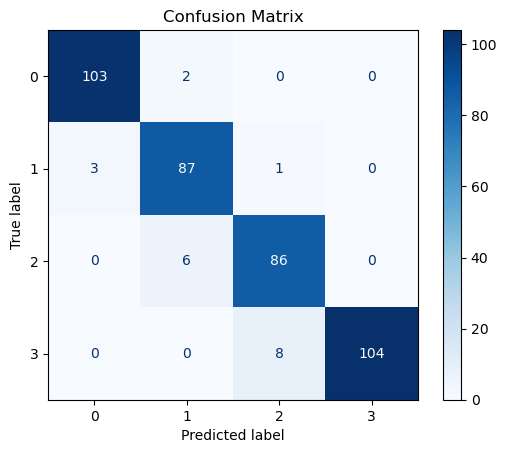

In [43]:
cm=confusion_matrix(y_test,predknn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

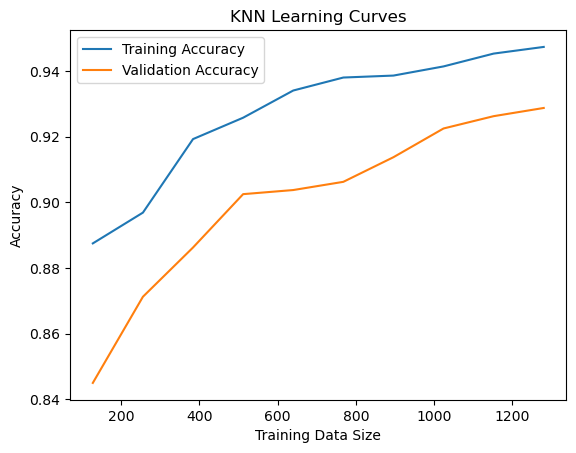

In [44]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    KNeighborsClassifier(n_neighbors=11), X_train, y_train, cv=5,
    scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Training Accuracy")
plt.plot(train_sizes, np.mean(val_scores, axis=1), label="Validation Accuracy")
plt.xlabel("Training Data Size")
plt.ylabel("Accuracy")
plt.title("KNN Learning Curves")
plt.legend()
plt.show()